# WGAN-GP Training

## imports

In [14]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle

from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [4]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 1 classes.


In [5]:
x_train[0][0][0]

array([[[ 0.5529412 ,  0.54509807,  0.58431375],
        [ 0.58431375,  0.5764706 ,  0.6156863 ],
        [ 0.6       ,  0.5921569 ,  0.6313726 ],
        ...,
        [ 0.37254903,  0.29411766,  0.28627452],
        [ 0.40392157,  0.30980393,  0.30980393],
        [ 0.42745098,  0.34901962,  0.33333334]],

       [[ 0.56078434,  0.5529412 ,  0.5921569 ],
        [ 0.6       ,  0.5921569 ,  0.6313726 ],
        [ 0.6313726 ,  0.62352943,  0.6627451 ],
        ...,
        [ 0.3882353 ,  0.30980393,  0.3019608 ],
        [ 0.41960785,  0.3254902 ,  0.3254902 ],
        [ 0.42745098,  0.34901962,  0.33333334]],

       [[ 0.6156863 ,  0.60784316,  0.64705884],
        [ 0.6392157 ,  0.6313726 ,  0.67058825],
        [ 0.654902  ,  0.64705884,  0.6862745 ],
        ...,
        [ 0.39607844,  0.31764707,  0.30980393],
        [ 0.41960785,  0.3254902 ,  0.3254902 ],
        [ 0.42745098,  0.34901962,  0.33333334]],

       ...,

       [[-0.8980392 , -0.8980392 , -0.8980392 ],
        [-0

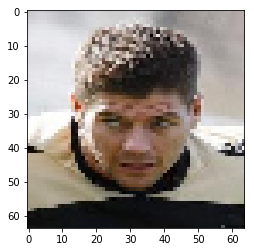

In [6]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [7]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))




AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

In [ ]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
__________

## training

In [ ]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

c:\Users\dev-fek\.conda\envs\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
W0101 17:47:52.724478 33096 deprecation.py:323] From c:\Users\dev-fek\.conda\envs\generative\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
c:\Users\dev-fek\.conda\envs\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (-0.4)(R -5.5, F -0.4, G 0.6)] [G loss: 0.8]


c:\Users\dev-fek\.conda\envs\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 (5, 1) [D loss: (-65.2)(R -113.1, F 0.7, G 4.7)] [G loss: -2.3]
2 (5, 1) [D loss: (-124.5)(R -212.4, F 23.3, G 6.5)] [G loss: -22.6]
3 (5, 1) [D loss: (-120.9)(R -192.2, F 15.0, G 5.6)] [G loss: -14.7]
4 (5, 1) [D loss: (-129.2)(R -191.8, F 8.9, G 5.4)] [G loss: -14.4]
5 (5, 1) [D loss: (-135.6)(R -206.6, F 8.8, G 6.2)] [G loss: -20.6]
6 (5, 1) [D loss: (-136.6)(R -186.8, F 2.4, G 4.8)] [G loss: -15.3]
7 (5, 1) [D loss: (-127.1)(R -211.9, F 10.4, G 7.4)] [G loss: -9.3]
8 (5, 1) [D loss: (-120.2)(R -211.9, F 19.6, G 7.2)] [G loss: -16.7]
9 (5, 1) [D loss: (-107.4)(R -197.6, F 31.2, G 5.9)] [G loss: -33.7]
10 (5, 1) [D loss: (-115.0)(R -197.5, F 23.8, G 5.9)] [G loss: -24.6]
11 (5, 1) [D loss: (-120.4)(R -218.0, F 34.7, G 6.3)] [G loss: -25.2]
12 (5, 1) [D loss: (-109.3)(R -177.1, F 16.0, G 5.2)] [G loss: -27.1]
13 (5, 1) [D loss: (-104.8)(R -138.6, F -28.6, G 6.2)] [G loss: 10.7]
14 (5, 1) [D loss: (-97.6)(R -192.2, F 16.2, G 7.8)] [G loss: -18.3]
15 (5, 1) [D loss: (-109.2)(R -180.6,

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
